In [45]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.exceptions import DataDimensionalityWarning
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# **Exploratory Data Analysis (EDA)**

In [16]:
data = pd.read_csv('abalone.csv')


In [17]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [18]:
# Check for missing values
data.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole weight,0
Shucked weight,0
Viscera weight,0
Shell weight,0
Rings,0


In [19]:
data.dtypes

,0
Sex,object
Length,float64
Diameter,float64
Height,float64
Whole weight,float64
Shucked weight,float64
Viscera weight,float64
Shell weight,float64
Rings,int64


In [20]:
data.describe()  # Get basic stats (mean, std, min, 25%, 50%, 75%, max)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [21]:
#Convert Categorical Features Use one-hot encoding for Sex
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)


In [22]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,True,False


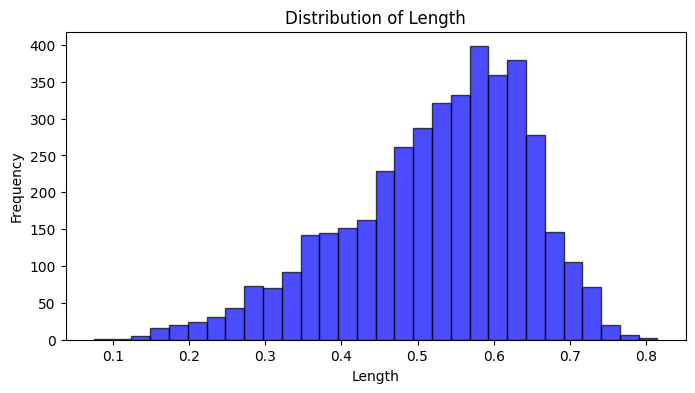

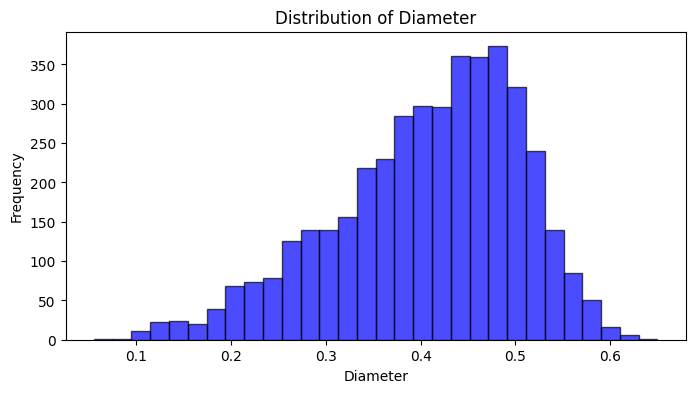

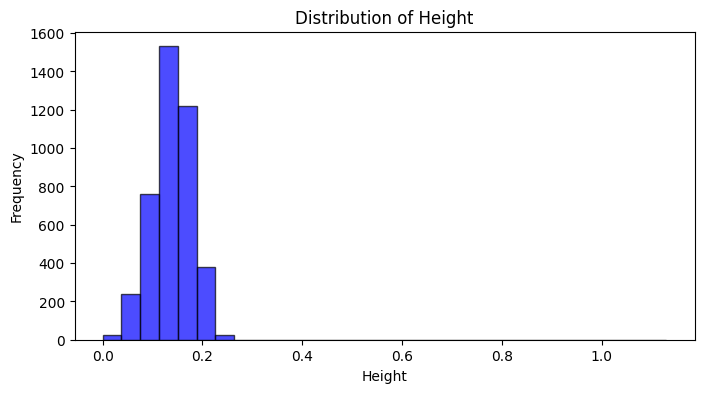

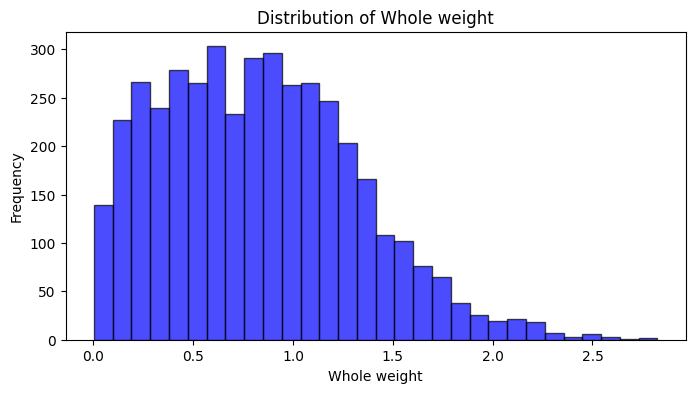

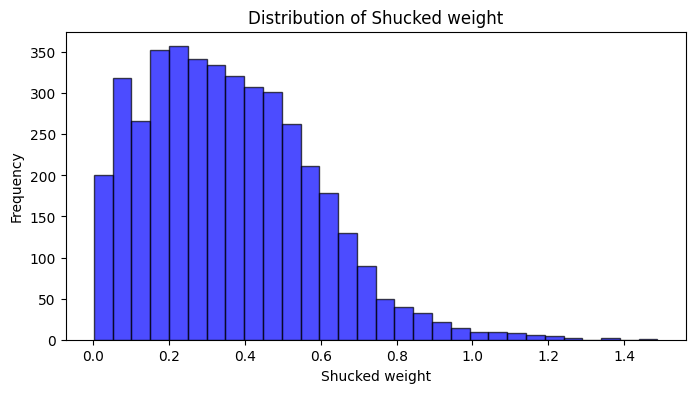

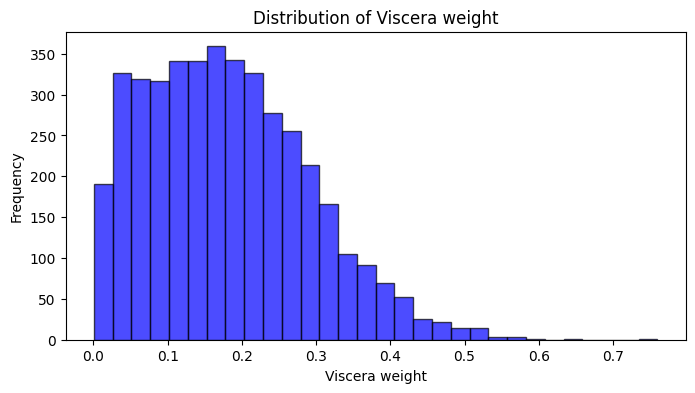

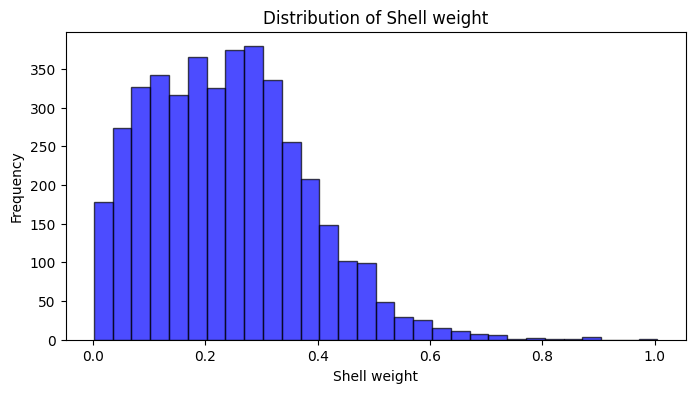

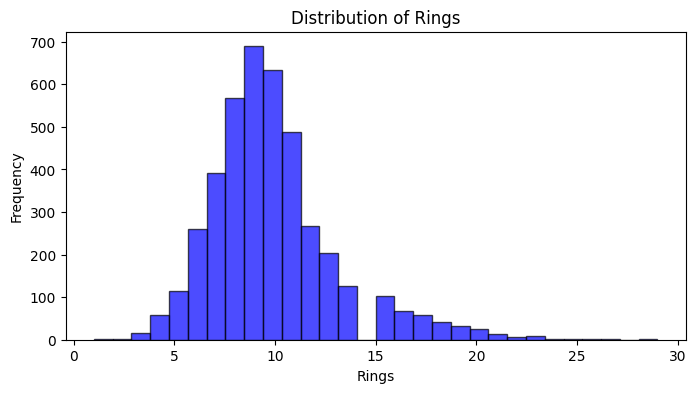

In [23]:
#Identify Patterns and Trends of the data
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(data[column], bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


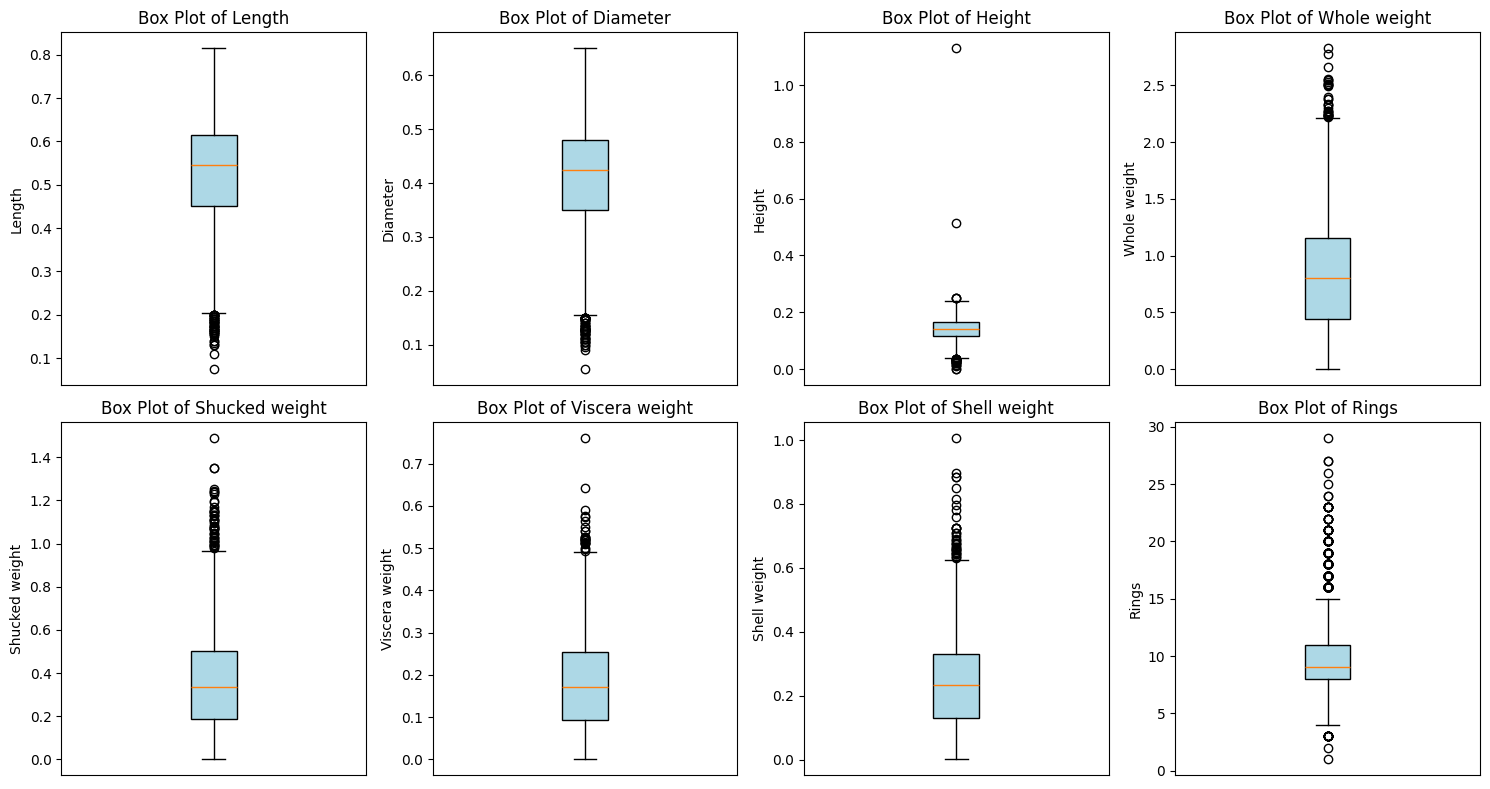

In [24]:
# List of features to visualize
features = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

# Create box plots
plt.figure(figsize=(15, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 4, i + 1)  # Create a grid layout for plots
    plt.boxplot(data[feature], vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    plt.title(f"Box Plot of {feature}")
    plt.ylabel(feature)
    plt.xticks([])

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [29]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# List of features categorized based on skewness or normality
iqr_features = ["Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
zscore_features = ["Length", "Diameter", "Height"]


# IQR Method for Skewed Features
for feature in iqr_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Remove outliers
    data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

# Z-Score Method for Approximately Normal Features
for feature in zscore_features:
    # Calculate Z-Scores
    data[f"{feature}_zscore"] = zscore(data[feature])
    # Remove rows where the z-score is greater than 3 or less than -3
    data = data[(data[f"{feature}_zscore"] <= 3) & (data[f"{feature}_zscore"] >= -3)]
    # Drop the zscore column after filtering
    data.drop(columns=[f"{feature}_zscore"], inplace=True)


print(f"Dataset size after outlier removal: {data.shape[0]}")

# Display the cleaned dataset
data.head()


Dataset size after outlier removal: 3796


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,True,False


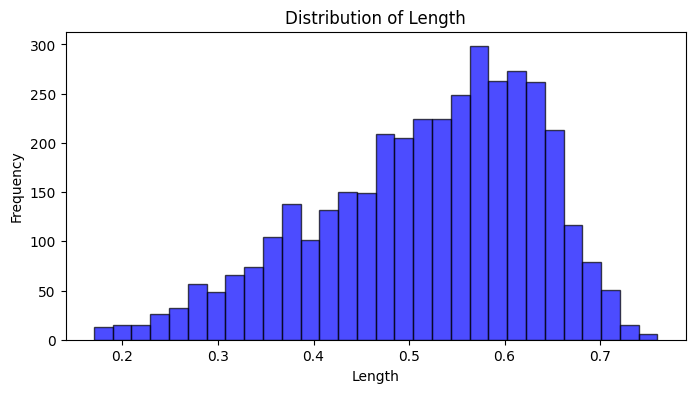

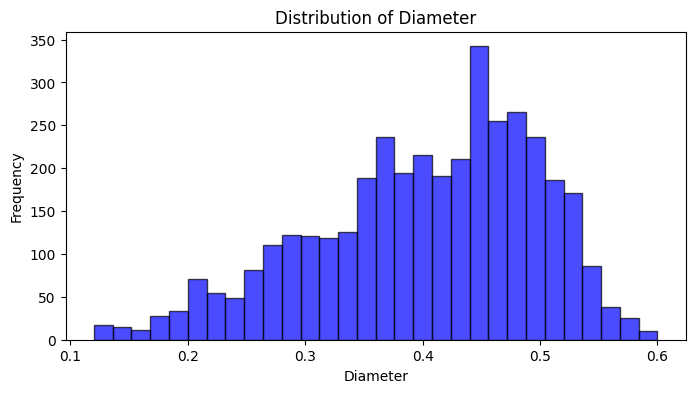

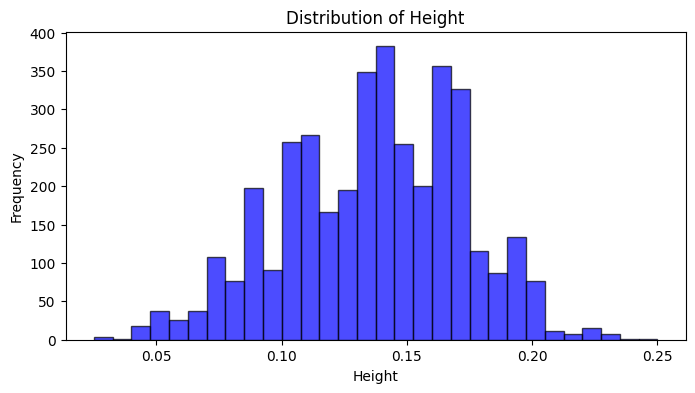

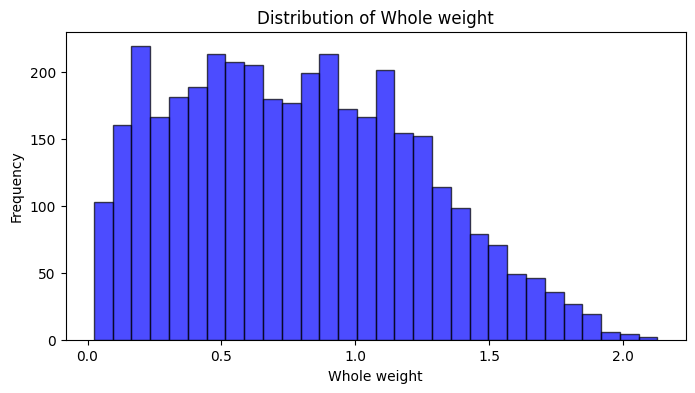

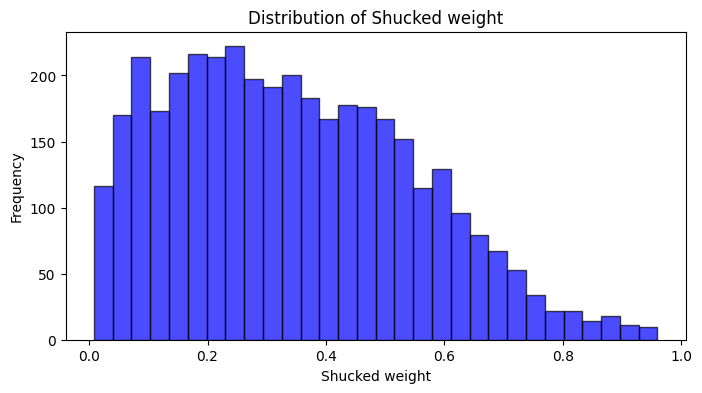

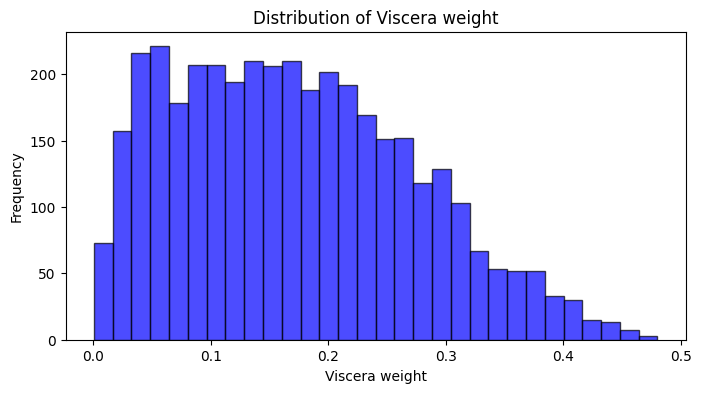

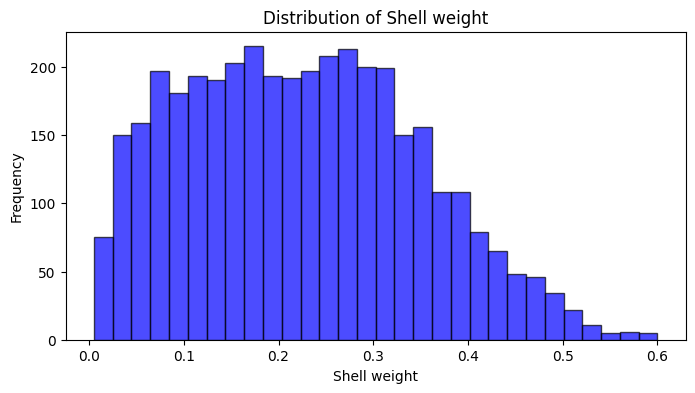

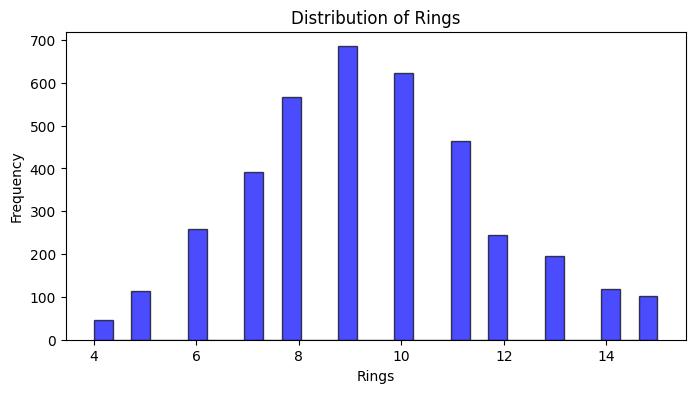

In [27]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(data[column], bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [32]:
# Select the appropriate columns for each scaler
normal_distribution_columns = ['Length', 'Diameter', 'Height']
skewed_columns = ['Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# Initialize scalers
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Apply StandardScaler to columns with normal distribution
data[normal_distribution_columns] = standard_scaler.fit_transform(data[normal_distribution_columns])

# Apply RobustScaler to columns with skewed distribution
data[skewed_columns] = robust_scaler.fit_transform(data[skewed_columns])

# Check the scaled dataset
data.head()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,-0.547444,-0.393953,-1.153289,-0.352412,-0.311377,-0.399351,-0.374332,2.000000,False,True
1,-1.465447,-1.452077,-1.292681,-0.767819,-0.710579,-0.740260,-0.802139,-0.666667,False,True
2,0.108273,0.188015,-0.038153,-0.117711,-0.209182,-0.136364,-0.053476,0.000000,False,False
3,-0.678587,-0.393953,-0.316937,-0.349532,-0.340120,-0.314935,-0.347594,0.333333,False,True
4,-1.640305,-1.557889,-1.571465,-0.797336,-0.742515,-0.798701,-0.882353,-0.666667,True,False


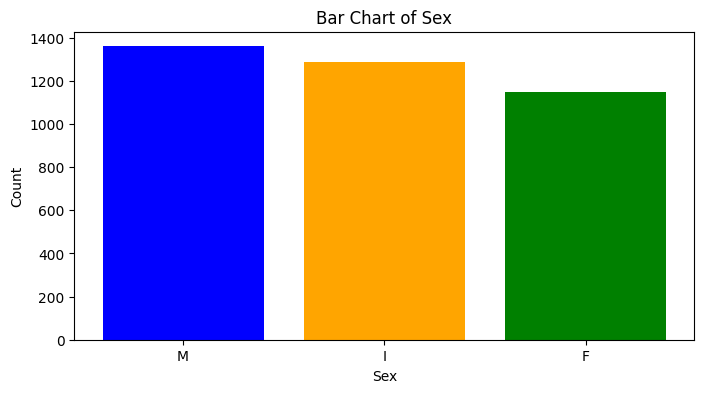

In [33]:
# Reverse engineering the original 'Sex' column
data['Sex'] = data.apply(
    lambda row: 'I' if row['Sex_I'] == 1 else ('M' if row['Sex_M'] == 1 else 'F'), axis=1
)

# Count occurrences of each category in the 'Sex' column
sex_counts = data['Sex'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 4))
plt.bar(sex_counts.index, sex_counts.values, color=['blue', 'orange', 'green'])
plt.title('Bar Chart of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


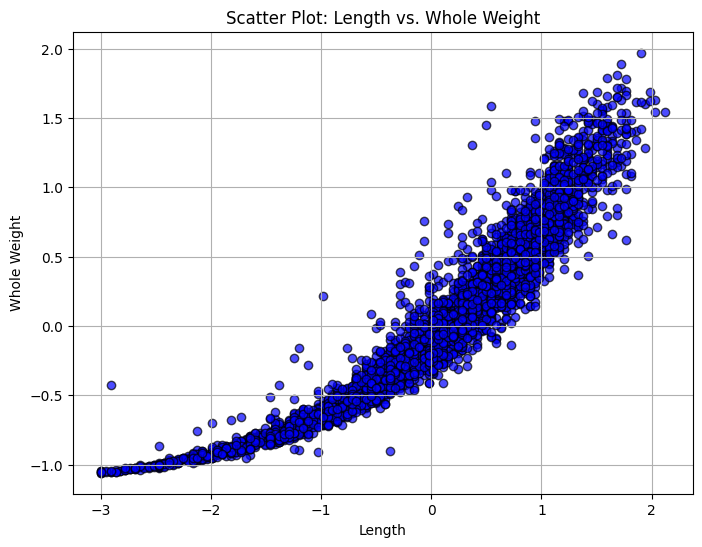

In [34]:
# Scatter Plot 1: Length vs. Whole Weight
plt.figure(figsize=(8, 6))
plt.scatter(data['Length'], data['Whole weight'], alpha=0.7, c='blue', edgecolor='k')
plt.title('Scatter Plot: Length vs. Whole Weight')
plt.xlabel('Length')
plt.ylabel('Whole Weight')
plt.grid(True)
plt.show()

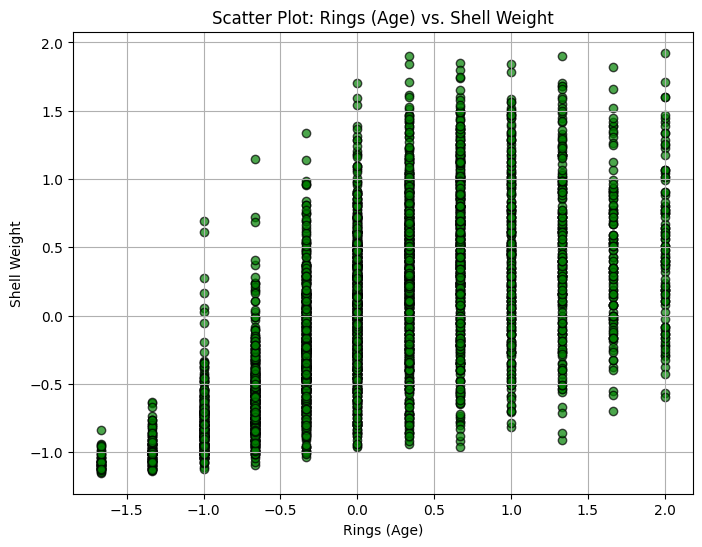

In [35]:
# Scatter Plot 2: Rings (Age) vs. Shell Weight
plt.figure(figsize=(8, 6))
plt.scatter(data['Rings'], data['Shell weight'], alpha=0.7, c='green', edgecolor='k')
plt.title('Scatter Plot: Rings (Age) vs. Shell Weight')
plt.xlabel('Rings (Age)')
plt.ylabel('Shell Weight')
plt.grid(True)
plt.show()

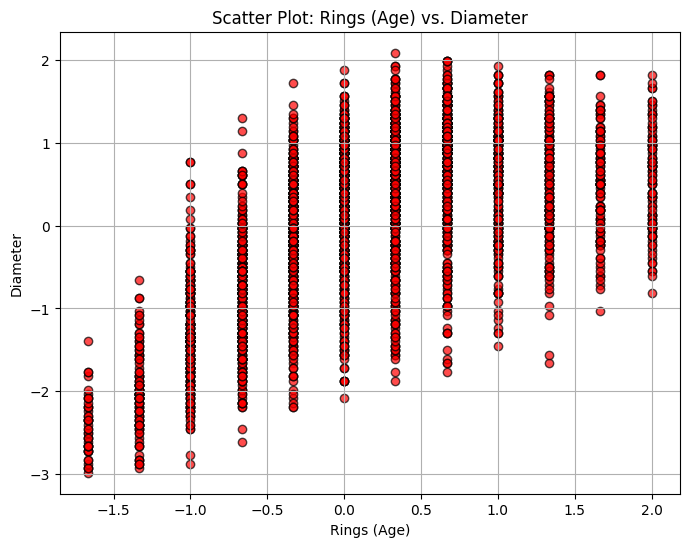

In [36]:
# Scatter Plot 3: Rings (Age) vs. Diameter
plt.figure(figsize=(8, 6))
plt.scatter(data['Rings'], data['Diameter'], alpha=0.7, c='red', edgecolor='k')
plt.title('Scatter Plot: Rings (Age) vs. Diameter')
plt.xlabel('Rings (Age)')
plt.ylabel('Diameter')
plt.grid(True)
plt.show()

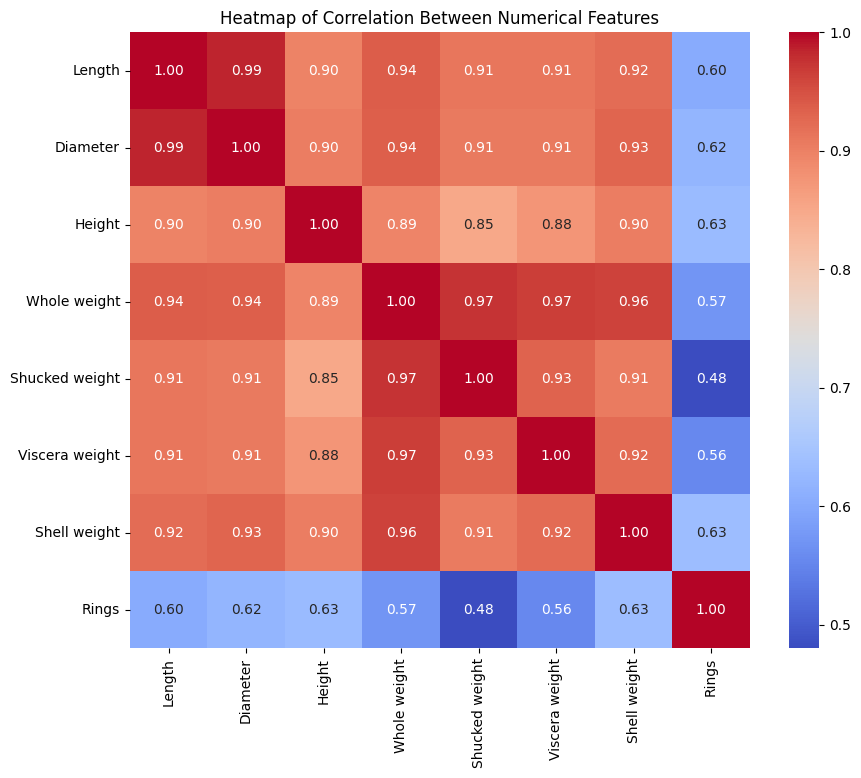

In [37]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Heatmap: Correlation Between Numerical Features
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()  # Compute the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlation Between Numerical Features')
plt.show()


# **Clustering Analysis**

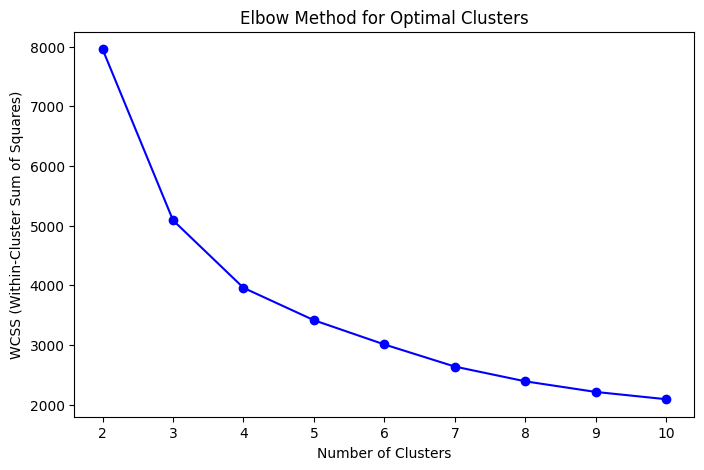

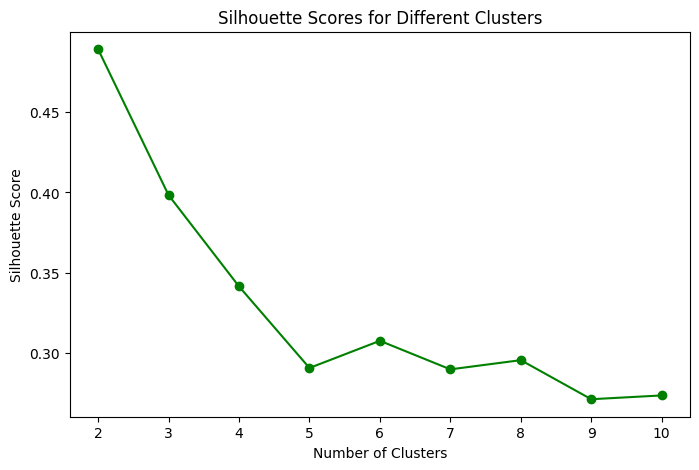

Optimal number of clusters: 2


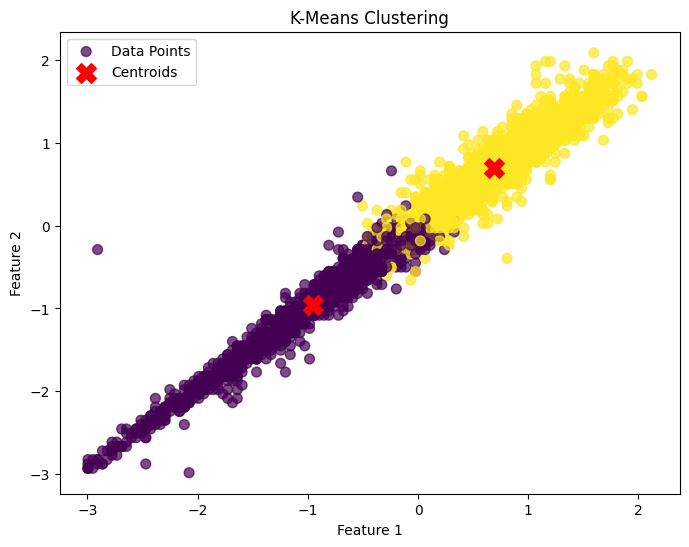

In [38]:
# Select only the numeric columns for clustering
clustering_data = data.select_dtypes(include=['float64', 'int64'])

# Function to perform K-Means and return the optimal number of clusters
def perform_kmeans(data, max_clusters=10):
    wcss = []  # Within-Cluster Sum of Squares
    silhouette_scores = []

    # Loop over possible numbers of clusters
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        kmeans.fit(clustering_data )

        # Append WCSS and silhouette score
        wcss.append(kmeans.inertia_)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(clustering_data , labels))

    # Plot the Elbow Method
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_clusters + 1), wcss, 'bo-')  # Elbow plot
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.show()

    # Plot the Silhouette Scores
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, 'go-')  # Silhouette plot
    plt.title('Silhouette Scores for Different Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

    # Return the optimal number of clusters
    optimal_clusters = np.argmax(silhouette_scores) + 2  # Offset by 2 since range starts at 2
    print(f"Optimal number of clusters: {optimal_clusters}")
    return optimal_clusters

# Function to visualize clusters
def plot_clusters(data, labels, centroids):
    plt.figure(figsize=(8, 6))
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
    plt.title('K-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()



# Perform K-Means clustering
optimal_clusters = perform_kmeans(clustering_data )

# Fit K-Means with optimal clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans.fit(clustering_data )
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters
plot_clusters(clustering_data , labels, centroids)


# **Regression Analysis**

In [39]:
# Select features and target
X = data[['Length']]  # Predictor (you can also try 'Whole weight' or other features)
y = data['Rings']  # Target



In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [41]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [42]:
# Predict on test data
y_pred = model.predict(X_test)



In [46]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")



Mean Squared Error (MSE): 0.4382439797972887
R-squared (R²): 0.3620492270867127


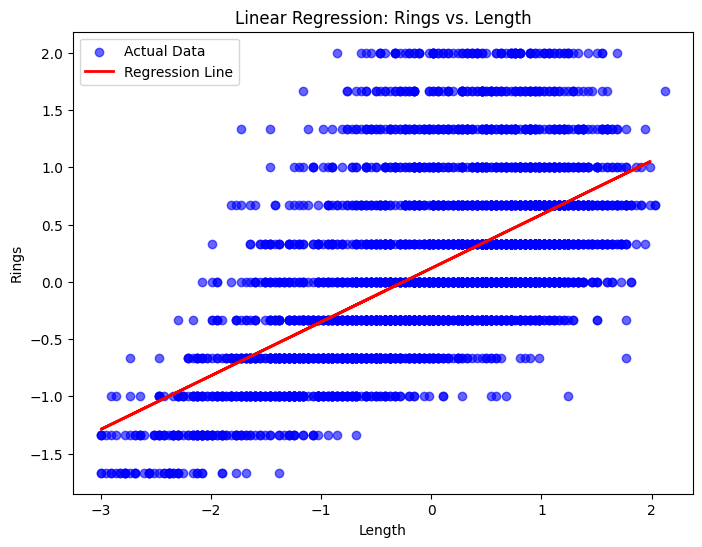

In [47]:
# Plot the regression line on a scatter plot of the actual data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Rings vs. Length')
plt.xlabel('Length')
plt.ylabel('Rings')
plt.legend()
plt.show()
